In [232]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [237]:
df = pd.read_excel('2data.xls')
df = df.values
df

array([[  0],
       [  0],
       [  0],
       ...,
       [158],
       [139],
       [212]], dtype=int64)

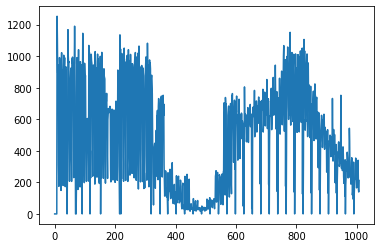

In [238]:
plt.plot(df)

In [239]:
df.mean()

490.36309523809524

In [240]:
df.std()

326.2440310029023

In [241]:
df = pd.DataFrame(df)
df.describe()

,0
count,1008.000000
mean,490.363095
std,326.405979
min,0.000000
25%,202.500000
50%,517.500000
75%,743.250000
max,1253.000000


In [242]:
len(df)

1008

In [243]:
train_data = df[:300]
test_data = df[300:364]

In [244]:
test_data

,0
300,895
301,956
302,995
303,917
304,370
305,214
306,844
307,1082
308,941
309,934


In [245]:
def norm(x):
  return (x - train_data.mean()) / train_data.std()
normed_train_data = norm(train_data)
normed_test_data = norm(test_data)

In [246]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        return np.array(dataX), np.array(dataY)


In [247]:
normed1 = np.array(normed_train_data)
normed2 = np.array(normed_test_data)

In [248]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(normed1, look_back)
testX, testY = create_dataset(normed2, look_back)

In [249]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [310]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pd.read_excel('2data.xls')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)



In [311]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [312]:
trainY.shape

(804,)

In [315]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(64, input_shape=(1, look_back)))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

Epoch 1/100
 - 2s - loss: 0.0485 - mse: 0.0485 - mae: 0.1715
Epoch 2/100
 - 2s - loss: 0.0450 - mse: 0.0450 - mae: 0.1634
Epoch 3/100
 - 2s - loss: 0.0427 - mse: 0.0427 - mae: 0.1587
Epoch 4/100
 - 2s - loss: 0.0431 - mse: 0.0431 - mae: 0.1598
Epoch 5/100
 - 2s - loss: 0.0436 - mse: 0.0436 - mae: 0.1632
Epoch 6/100
 - 2s - loss: 0.0419 - mse: 0.0419 - mae: 0.1565
Epoch 7/100
 - 2s - loss: 0.0424 - mse: 0.0424 - mae: 0.1581
Epoch 8/100
 - 2s - loss: 0.0426 - mse: 0.0426 - mae: 0.1586
Epoch 9/100
 - 2s - loss: 0.0424 - mse: 0.0424 - mae: 0.1573
Epoch 10/100
 - 2s - loss: 0.0412 - mse: 0.0412 - mae: 0.1548
Epoch 11/100
 - 2s - loss: 0.0407 - mse: 0.0407 - mae: 0.1520
Epoch 12/100
 - 2s - loss: 0.0420 - mse: 0.0420 - mae: 0.1559
Epoch 13/100
 - 2s - loss: 0.0416 - mse: 0.0416 - mae: 0.1557
Epoch 14/100
 - 2s - loss: 0.0409 - mse: 0.0409 - mae: 0.1531
Epoch 15/100
 - 2s - loss: 0.0412 - mse: 0.0412 - mae: 0.1532
Epoch 16/100
 - 2s - loss: 0.0411 - mse: 0.0411 - mae: 0.1541
Epoch 17/100
 - 2

Train Score: 248.52 RMSE
Test Score: 195.05 RMSE


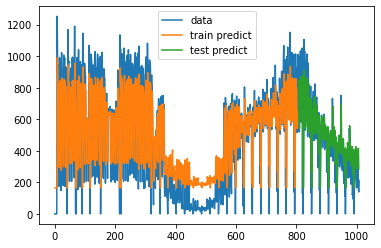

In [319]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='data')
plt.plot(trainPredictPlot, label='train predict')
plt.plot(testPredictPlot, label='test predict')
plt.legend()
plt.show()

In [298]:
# calculate the spearmans's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr, pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# calculate spearman's correlation
corr, _ = spearmanr(trainX, trainY)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.684


In [309]:
score = model.evaluate(testX, testY)
print(score)

200/200 [==============================] - 0s 150us/step
[0.02385698411613703, 0.023856982588768005, 0.1099412739276886]


ValueError: x and y must be the same size

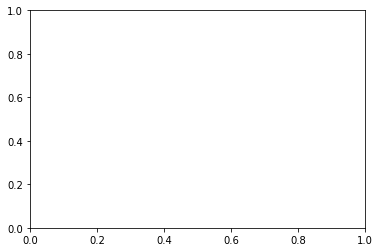

In [318]:
test_predictions = model.predict(trainX).flatten()

plt.scatter(testX, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv, read_excel
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_excel('.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [250]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout

In [251]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(64, input_shape=(1, look_back)))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Dense(1, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'accuracy'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 64)                16896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_123 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_124 (Dense)            (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_125 (Dense)            (None, 64)                4160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)              

In [254]:
trainX

array([[[-1.94774245]]])

In [252]:
history = model.fit(trainX, trainY, epochs=1000, batch_size=1, verbose=2, validation_data=(testX, testY))

Train on 1 samples, validate on 1 samples
Epoch 1/1000
 - 1s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 2/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 3/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 4/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 5/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 6/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 7/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 8/1000


Epoch 61/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 62/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 63/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 64/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 65/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 66/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 67/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 68/1000
 - 0s - loss: 8.6892 - mse: 8.6892

Epoch 122/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 123/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 124/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 125/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 126/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 127/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 128/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 129/1000
 - 0s - loss: 8.6892 - mse

Epoch 182/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 183/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 184/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 185/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 186/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 187/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 188/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 189/1000
 - 0s - loss: 8.6892 - mse

Epoch 242/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 243/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 244/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 245/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 246/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 247/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 248/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 249/1000
 - 0s - loss: 8.6892 - mse

Epoch 302/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 303/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 304/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 305/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 306/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 307/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 308/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 309/1000
 - 0s - loss: 8.6892 - mse

Epoch 362/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 363/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 364/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 365/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 366/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 367/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 368/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 369/1000
 - 0s - loss: 8.6892 - mse

Epoch 422/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 423/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 424/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 425/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 426/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 427/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 428/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 429/1000
 - 0s - loss: 8.6892 - mse

Epoch 482/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 483/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 484/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 485/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 486/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 487/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 488/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 489/1000
 - 0s - loss: 8.6892 - mse

Epoch 542/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 543/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 544/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 545/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 546/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 547/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 548/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 549/1000
 - 0s - loss: 8.6892 - mse

Epoch 602/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 603/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 604/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 605/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 606/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 607/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 608/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 609/1000
 - 0s - loss: 8.6892 - mse

Epoch 662/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 663/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 664/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 665/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 666/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 667/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 668/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 669/1000
 - 0s - loss: 8.6892 - mse

Epoch 722/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 723/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 724/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 725/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 726/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 727/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 728/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 729/1000
 - 0s - loss: 8.6892 - mse

Epoch 782/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 783/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 784/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 785/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 786/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 787/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 788/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 789/1000
 - 0s - loss: 8.6892 - mse

Epoch 842/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 843/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 844/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 845/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 846/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 847/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 848/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 849/1000
 - 0s - loss: 8.6892 - mse

Epoch 902/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 903/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 904/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 905/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 906/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 907/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 908/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 909/1000
 - 0s - loss: 8.6892 - mse

Epoch 962/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 963/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 964/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 965/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 966/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 967/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 968/1000
 - 0s - loss: 8.6892 - mse: 8.6892 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_mse: 0.0057 - val_accuracy: 0.0000e+00
Epoch 969/1000
 - 0s - loss: 8.6892 - mse

In [253]:
score = model.evaluate(testX, testY)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

1/1 [==============================] - 0s 5ms/step
Test score:  0.005687873810529709
Test accuracy:  0.005687873810529709


In [195]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mse,val_accuracy,loss,mse,accuracy,epoch
95,0.304618,0.304618,0.0,0.309875,0.309875,0.004149,95
96,0.304618,0.304618,0.0,0.309875,0.309875,0.004149,96
97,0.304618,0.304618,0.0,0.309875,0.309875,0.004149,97
98,0.304618,0.304618,0.0,0.309875,0.309875,0.004149,98
99,0.304618,0.304618,0.0,0.309875,0.309875,0.004149,99


In [196]:
y = hist[['val_loss']].values
x = hist[['val_mse']].values

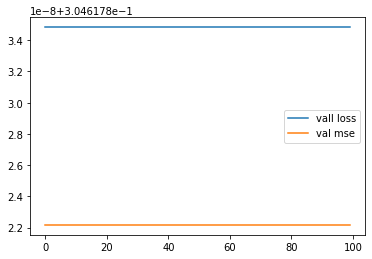

In [197]:
plt.plot(y, label='vall loss')
plt.plot(x, label='val mse')
plt.legend()
plt.show()

In [213]:
model.predict([[1253][1][1]])

IndexError: list index out of range

In [36]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_data.keys())]),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
model = build_model()

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [39]:
example_batch = normed_train_data[:10]
example_batch = example_batch.values
example_result = model.predict(example_batch)
example_result

array([[0.6191515 ],
       [0.6191515 ],
       [0.6191515 ],
       [0.6191515 ],
       [0.6191515 ],
       [0.6191515 ],
       [0.6191515 ],
       [0.6191515 ],
       [0.5573979 ],
       [0.54381114]], dtype=float32)

In [40]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

NameError: name 'train_labels' is not defined